In [1]:
# !pip install astsa 
# py 3.12

In [2]:
import numpy as np
import pandas as pd
import astsa
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator


### 1.1 Johnson & Johnson Quarterly Earnings (1960-1980)

In [3]:
jj = astsa.load_jj()

jj.head(8)

,Time,Value
0,1960-Q1,0.71
1,1960-Q2,0.63
2,1960-Q3,0.85
3,1960-Q4,0.44
4,1961-Q1,0.61
5,1961-Q2,0.69
6,1961-Q3,0.92
7,1961-Q4,0.55


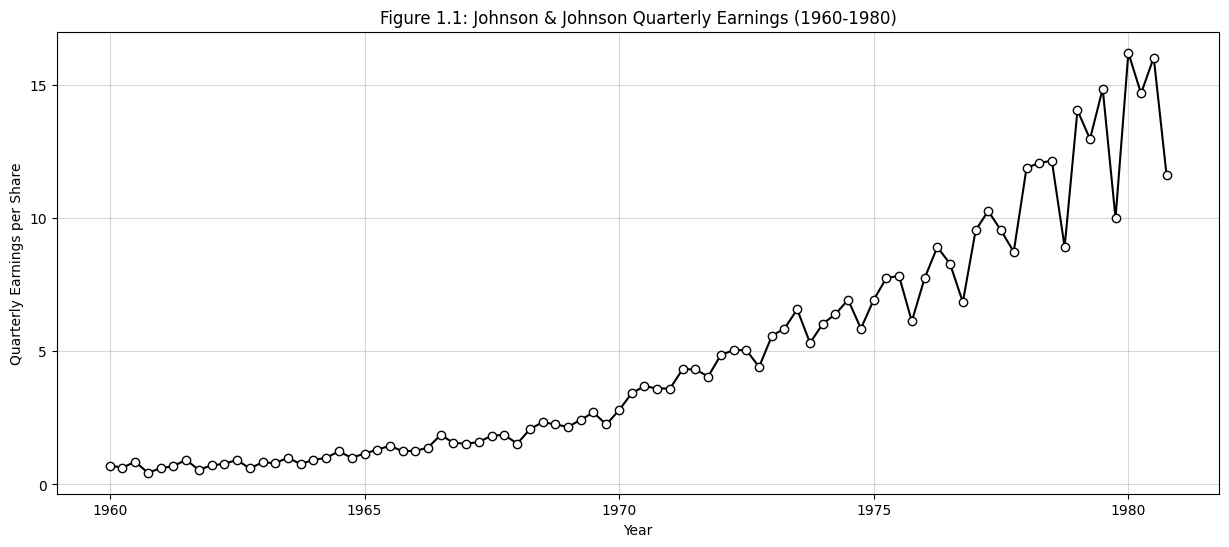

In [4]:
jj['Time'] = pd.PeriodIndex(jj['Time'], freq='Q').to_timestamp()

plt.figure(figsize=(15, 6))  
plt.plot(jj['Time'], jj['Value'], marker='o', linestyle='-',markerfacecolor='white', markeredgecolor='black',color='black')

plt.title("Figure 1.1: Johnson & Johnson Quarterly Earnings (1960-1980)")
plt.ylabel("Quarterly Earnings per Share")
plt.xlabel("Year")

plt.grid(True, alpha=0.5)

plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.gca().yaxis.set_major_locator(MultipleLocator(5))

plt.show()


###  1.2 Yearly average global temperature deviations (1880–2015) in degrees centigrade

In [5]:
data_url = "https://raw.githubusercontent.com/datasets/global-temp/master/data/annual.csv"
 
data = pd.read_csv(data_url)

data_filtered = data[(data['Year'] >= 1880) & (data['Year'] <= 2015)]

data_filtered.head(8)

,Source,Year,Mean
30,GISTEMP,1880,-0.1725
31,gcag,1880,-0.3158
32,GISTEMP,1881,-0.0883
33,gcag,1881,-0.2322
34,GISTEMP,1882,-0.1067
35,gcag,1882,-0.2955
36,GISTEMP,1883,-0.1742
37,gcag,1883,-0.3465


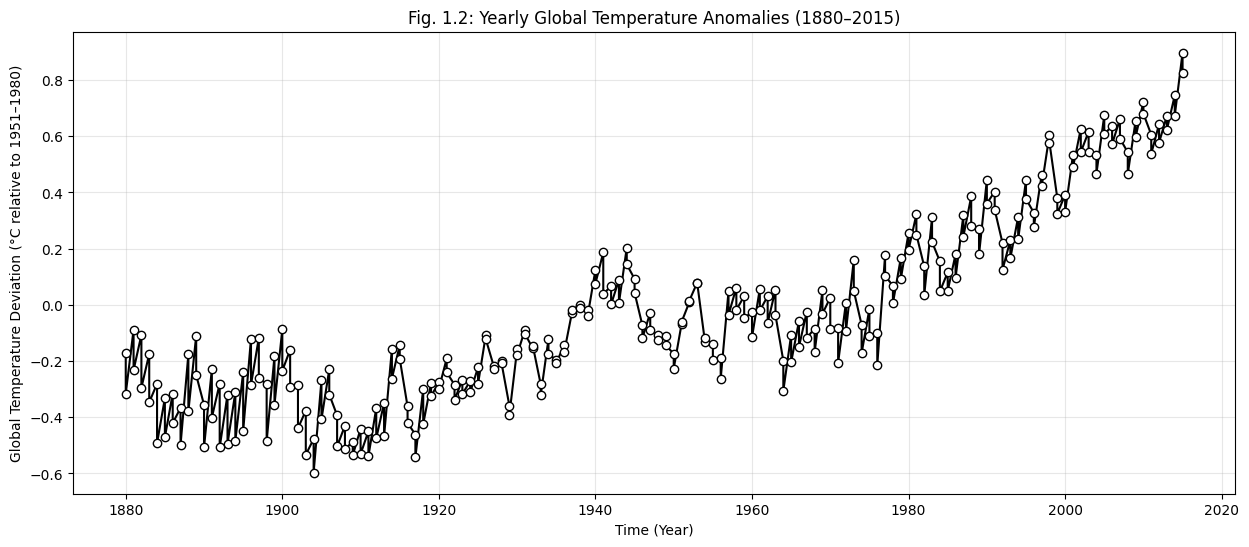

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(data_filtered["Year"], data_filtered["Mean"], marker='o', linestyle='-', markeredgecolor='black',color='black', markerfacecolor='white' )

plt.title('Fig. 1.2: Yearly Global Temperature Anomalies (1880–2015)')
plt.xlabel('Time (Year)')
plt.ylabel('Global Temperature Deviation (°C relative to 1951–1980)')

plt.grid(True, alpha=0.3)

plt.show()


### 1.3. Speech recording of the syllable aaa ··· hhh sampled at 10,000 points per second with n = 1020 points.

In [7]:
speech = astsa.load_speech()

speech.head(8)  

,Time,Value
0,1,1814
1,2,1556
2,3,1442
3,4,1416
4,5,1352
5,6,1154
6,7,974
7,8,962


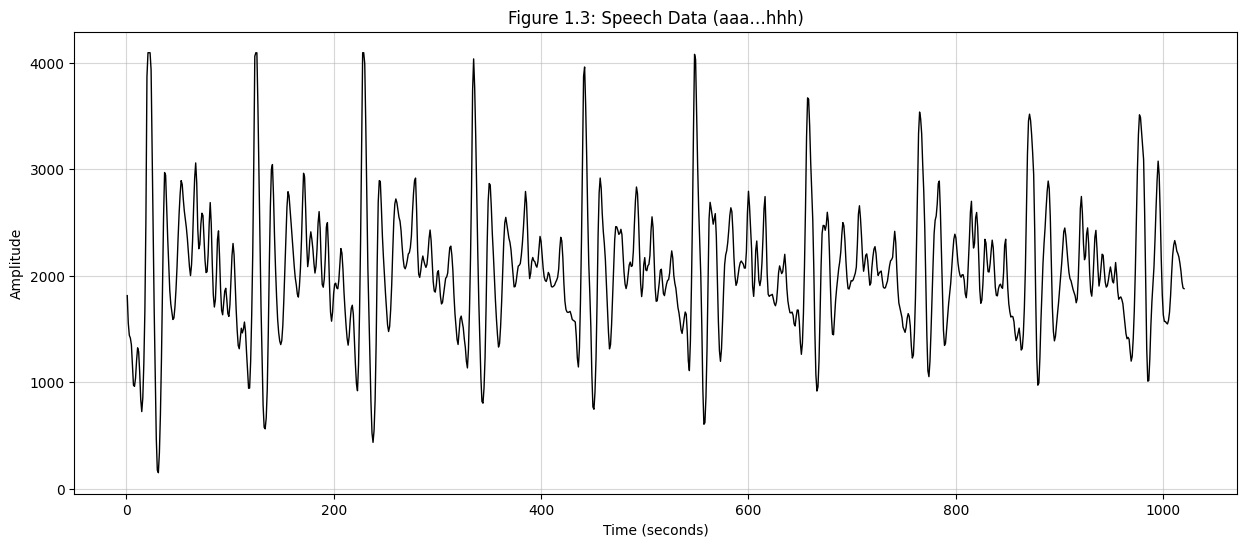

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(speech["Time"], speech["Value"], color="black", linewidth=1)

plt.title("Figure 1.3: Speech Data (aaa…hhh)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")

plt.grid(True, alpha=0.5)
plt.gca().yaxis.set_major_locator(MultipleLocator(1000))

plt.show()

### 1.4 The daily returns of the Dow Jones Industrial Average (DJIA) from April 20, 2006 to April 20, 2016.

In [9]:
djia = astsa.load_djia()

djia["Date"] = pd.to_datetime(djia["Date"])

djia.head(8)


,Date,Open,High,Low,Close,Volume
0,2006-04-20,11278.530273,11384.110352,11275.049805,11342.889648,336420000.0
1,2006-04-21,11343.450195,11405.879883,11316.790039,11347.450195,325090000.0
2,2006-04-24,11346.809570,11359.700195,11305.830078,11336.320312,232000000.0
3,2006-04-25,11336.559570,11355.370117,11260.839844,11283.250000,289230000.0
4,2006-04-26,11283.250000,11379.870117,11282.769531,11354.490234,270270000.0
5,2006-04-27,11349.530273,11416.929688,11275.299805,11382.509766,361740000.0
6,2006-04-28,11358.330078,11417.660156,11347.209961,11367.139648,738440000.0
7,2006-05-01,11367.780273,11428.370117,11329.440430,11343.290039,365970000.0


In [10]:
returns = np.diff(np.log(djia["Close"]))

# Corresponding dates (drop first date)
dates = djia["Date"].iloc[1:]
dates.head(8)

1   2006-04-21
2   2006-04-24
3   2006-04-25
4   2006-04-26
5   2006-04-27
6   2006-04-28
7   2006-05-01
8   2006-05-02
Name: Date, dtype: datetime64[ns]

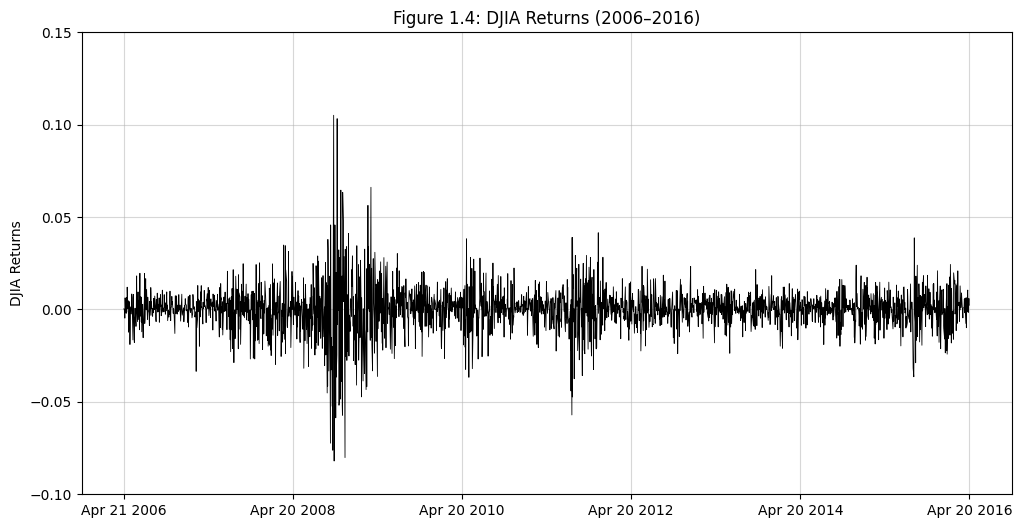

In [11]:
plt.figure(figsize=(12,6))
plt.plot(dates, returns, "k", lw=0.6,)

plt.title("Figure 1.4: DJIA Returns (2006–2016)")
plt.ylabel("DJIA Returns")

# Dynamic X-axis (6 ticks)
xt = pd.date_range(dates.min(), dates.max(), 6)
plt.xticks(xt, xt.strftime("%b %d %Y"))

# Dynamic Y-axis (step = 0.05)
plt.ylim(np.floor(returns.min()/0.05)*0.05,
         np.ceil(returns.max()/0.05)*0.05)
plt.gca().yaxis.set_major_locator(MultipleLocator(0.05))

plt.grid(alpha=0.5)
plt.show()


### 1.5 Monthly SOI and Recruitment (estimated new fish), 1950-1987.

In [12]:
soi = astsa.load_soi()
print("SOI","\n")
soi.head(8)

SOI 



,Time,Value
0,1950.000000,0.377
1,1950.083333,0.246
2,1950.166667,0.311
3,1950.250000,0.104
4,1950.333333,-0.016
5,1950.416667,0.235
6,1950.500000,0.137
7,1950.583333,0.191


In [13]:
rec = astsa.load_rec()
print("Recruitment","\n")
rec.head(8)

Recruitment 



,Time,Value
0,1950.000000,68.63
1,1950.083333,68.63
2,1950.166667,68.63
3,1950.250000,68.63
4,1950.333333,68.63
5,1950.416667,68.63
6,1950.500000,59.16
7,1950.583333,48.70


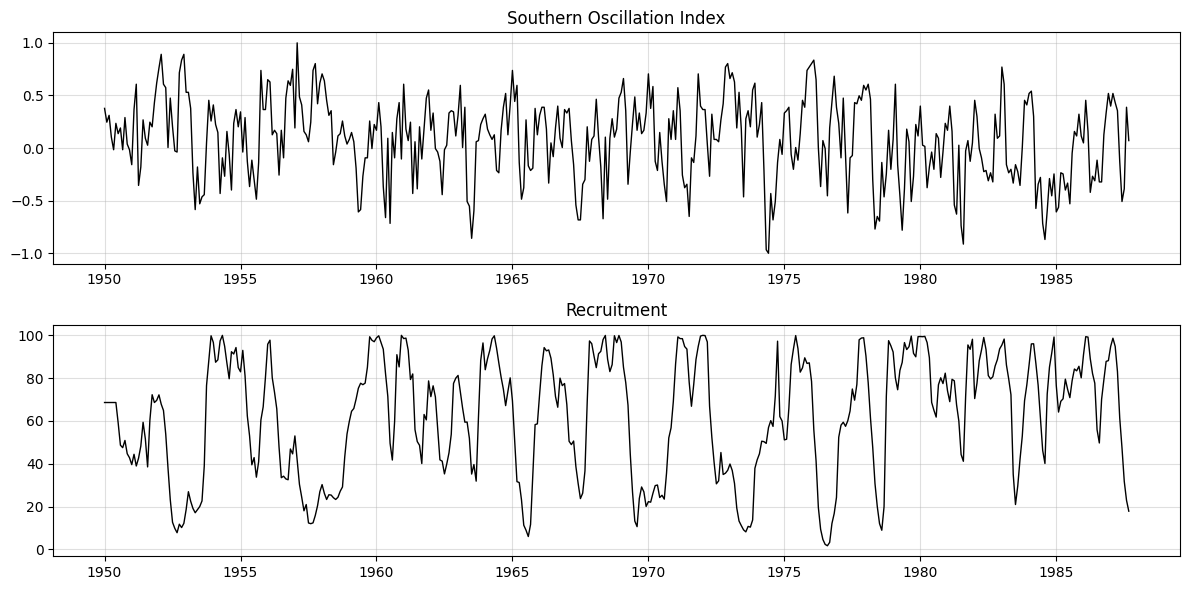

In [14]:
plt.figure(figsize=(12, 6))

# SOI
plt.subplot(2, 1, 1)
plt.plot(soi["Time"], soi["Value"], color="black", linewidth=1)
plt.title("Southern Oscillation Index")
plt.grid(True, alpha=0.4)

# Recruitment
plt.subplot(2, 1, 2)
plt.plot(rec["Time"], rec["Value"], color="black", linewidth=1)
plt.title("Recruitment")
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()


### 1.6 MRI data from various locations in the cortex, thalamus,and cerebellum; n = 128 points, one observation taken every 2 seconds.

In [15]:
fmri1 = astsa.load_fmri1()

fmri1.head(8)

,time,cort1,cort2,cort3,cort4,thal1,thal2,cere1,cere2
0,1,-0.336,-0.088,-0.579,-0.221,-0.222,-0.046,-0.354,-0.028
1,2,-0.192,-0.359,-0.475,-0.058,0.072,-0.039,-0.346,-0.032
2,3,0.062,0.062,0.063,0.192,0.145,-0.256,-0.337,0.272
3,4,0.128,0.221,0.234,-0.004,-0.104,-0.030,0.149,0.042
4,5,0.358,0.199,0.388,0.255,0.035,-0.081,0.311,-0.080
5,6,0.342,0.054,0.377,0.430,-0.005,0.047,0.403,-0.016
6,7,0.608,0.051,0.262,0.160,0.367,-0.294,0.100,-0.078
7,8,0.398,-0.113,0.119,0.114,0.312,0.052,0.017,0.000


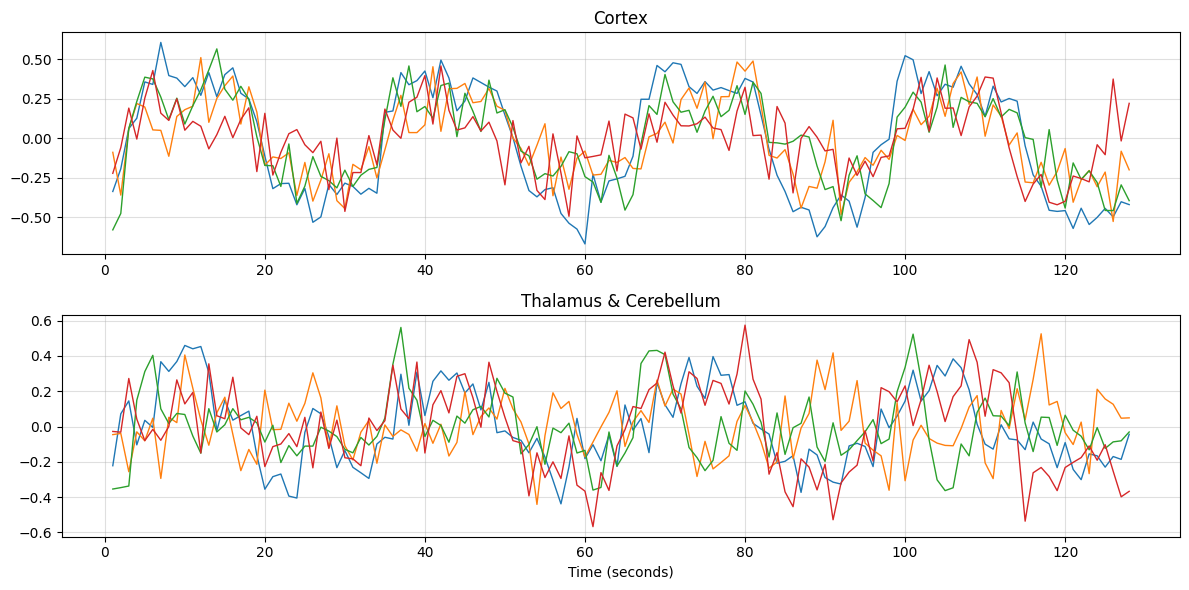

In [16]:
plt.figure(figsize=(12, 6))

# Cortex signals 
plt.subplot(2, 1, 1)
for col in fmri1.columns[1:5]:
    plt.plot(fmri1["time"], fmri1[col], linewidth=1)
plt.title("Cortex")
plt.grid(True, alpha=0.4)

# Thalamus & Cerebellum signals 
plt.subplot(2, 1, 2)
for col in fmri1.columns[5:9]:
    plt.plot(fmri1["time"], fmri1[col], linewidth=1)
plt.title("Thalamus & Cerebellum")
plt.xlabel("Time (seconds)")
plt.grid(True, alpha=0.4)


plt.tight_layout()
plt.show()


### 1.7  Arrival phases from an earthquake (top) and explosion (bottom) at 40 points per second

In [17]:
# Earthquake
earthquake  = astsa.load_EQ5()
print("Earthquake","\n")
earthquake.head(8)


Earthquake 



,Time,Value
0,1,0.017493
1,2,0.011391
2,3,0.015124
3,4,0.014765
4,5,0.006509
5,6,-0.002322
6,7,-0.013091
7,8,-0.017757


In [18]:
# Explosion
explosion = astsa.load_EXP6()
print("Explosion","\n")
explosion.head(8)

Explosion 



,Time,Value
0,1,-0.001837
1,2,-0.000554
2,3,-0.002284
3,4,-0.000303
4,5,-0.000721
5,6,-0.001391
6,7,-0.000944
7,8,-0.004907


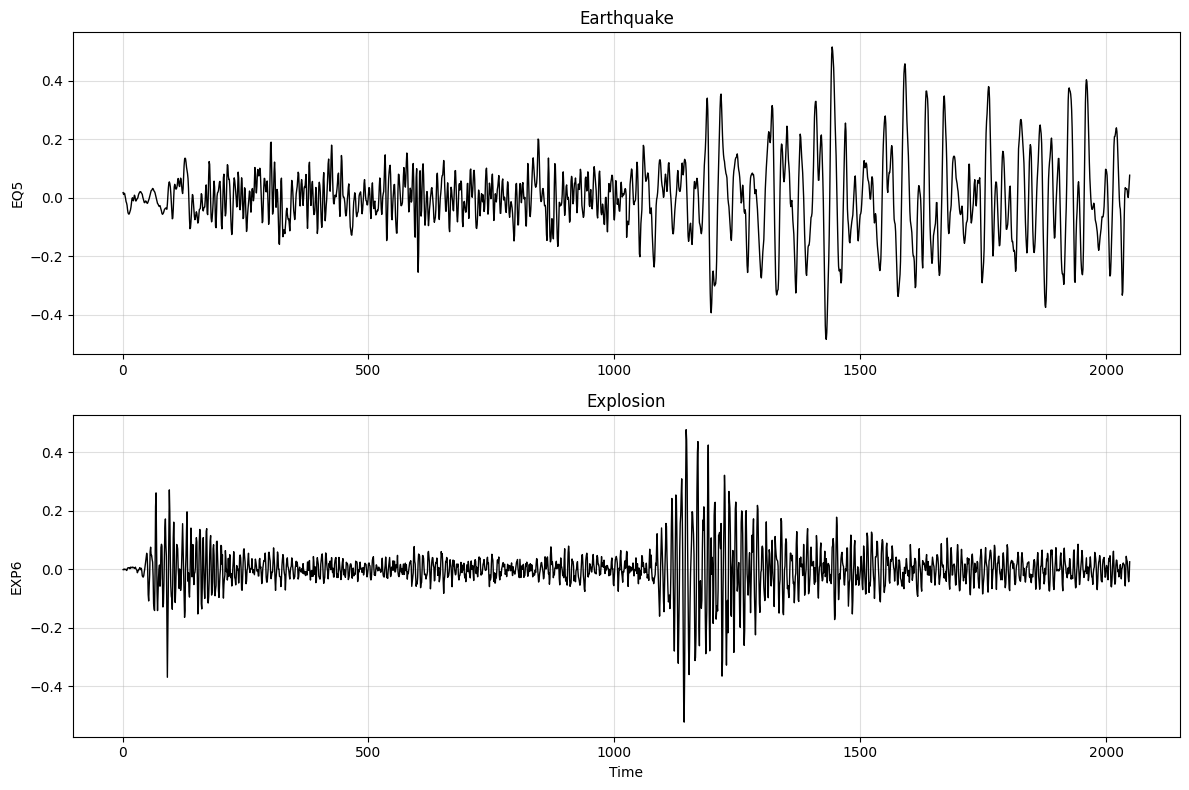

In [19]:
plt.figure(figsize=(12, 8))

# Earthquake
plt.subplot(2, 1, 1)
plt.plot(earthquake["Time"], earthquake["Value"], color="black", linewidth=1)
plt.title("Earthquake")
plt.ylabel("EQ5")
plt.grid(True, alpha=0.4)

# Explosion
plt.subplot(2, 1, 2)
plt.plot(explosion["Time"], explosion["Value"], color="black", linewidth=1)
plt.title("Explosion")
plt.xlabel("Time")
plt.ylabel("EXP6")
plt.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()
